In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from plotnine import *

In [28]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [29]:
X = penguins.drop(['species'], axis = 1)
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [30]:
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),
         make_column_selector(dtype_include = object)),
        
        ('standardize', StandardScaler(), make_column_selector(dtype_include = np.number))
    ], remainder = 'passthrough'
)

Let’s use the other variables to predict species. Prepare your data and fit the following models on the entire dataset:

Two kNN models (for different values of K)
Two decision tree models (for different complexities of trees)
Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

Confusion matrix
Overall Accuracy
Precision, Recall, AUC, and F1-score for each species

In [31]:
# KNN

knn_pipe1 = Pipeline(
    [
        ('preprocessing', ct),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)


knn_pipe1.fit(X_train, y_train)
knn_pred1 = knn_pipe1.predict(X_test)


In [32]:
knn_pipe2 = Pipeline(
    [
        ('preprocessing', ct),
        ('knn', KNeighborsClassifier(n_neighbors=100))
    ]
)

knn_pipe2.fit(X_train, y_train)
knn_pred2 = knn_pipe2.predict(X_test)

In [33]:
# Confussion Matrix

knn_matrix1 = confusion_matrix(y_test, knn_pred1)
knn_matrix2 = confusion_matrix(y_test, knn_pred2)



matrix1 = pd.DataFrame(knn_matrix1)
matrix2 = pd.DataFrame(knn_matrix2)

print(matrix1)
print()
print(matrix2)

    0   1   2
0  39   0   0
1   1  16   0
2   0   0  28

    0  1   2
0  39  0   0
1  13  4   0
2   0  0  28


In [34]:

knn_accuracy1 = accuracy_score(y_test, knn_pred1)
knn_accuracy2 = accuracy_score(y_test, knn_pred2)


knn_precision1 = precision_score(y_test, knn_pred1, average=None)
knn_precision2 = precision_score(y_test, knn_pred2, average=None)





knn_recall_1 = recall_score(y_test, knn_pred2, average = None)
knn_recall_2 = recall_score(y_test, knn_pred2, average = None)




class_report1 = classification_report(y_test, knn_pred1)
class_report2 = classification_report(y_test, knn_pred2)


prob_knn_1 = knn_pipe1.predict_proba(X_test)
roc_auc_knn_1 = roc_auc_score(y_test, prob_knn_1, multi_class='ovr')
prob_knn_2 = knn_pipe1.predict_proba(X_test)
roc_auc_knn_2 = roc_auc_score(y_test, prob_knn_2, multi_class='ovr')

In [35]:
# Decision Tree
dt_pipe1 = Pipeline(
    [
        ('preprocessing', ct),
        ('dt', DecisionTreeClassifier(min_samples_leaf = 2))
    ]
)
dt_pipe2 = Pipeline(
    [
        ('preprocessing', ct),
        ('dt', DecisionTreeClassifier(min_samples_leaf = 50))
    ]
)



dt_pipe1.fit(X_train, y_train)
dt_pred1 = dt_pipe1.predict(X_test)

dt_pipe2.fit(X_train, y_train)
dt_pred2 = dt_pipe2.predict(X_test)



# Confusion Matrix
matrix_tree1 = confusion_matrix(y_test, dt_pred1)
matrix_tree2 = confusion_matrix(y_test, dt_pred2)

print(matrix_tree1)
print()
print(matrix_tree2)

[[38  1  0]
 [ 2 15  0]
 [ 0  0 28]]

[[38  0  1]
 [ 2 15  0]
 [ 0  0 28]]


In [36]:

dt_accuracy_1 = accuracy_score(y_test, dt_pred1)
dt_accuracy_2 = accuracy_score(y_test, dt_pred2)




dt_precision1 = precision_score(y_test, dt_pred1, average=None)
dt_precision2 = precision_score(y_test, dt_pred2, average=None)




dt_recall_1 = recall_score(y_test, dt_pred2, average = None)
dt_recall_2 = recall_score(y_test, dt_pred2, average = None)




class_dtreport1 = classification_report(y_test, dt_pred1)
class_dtreport2 = classification_report(y_test, dt_pred2)

# ROC and AUC

prob_dt_1 = dt_pipe1.predict_proba(X_test)
roc_auc_dt_1 = roc_auc_score(y_test, prob_dt_1, multi_class='ovr')


prob_dt_2 = dt_pipe1.predict_proba(X_test)
roc_auc_dt_2 = roc_auc_score(y_test, prob_dt_2, multi_class='ovr')

/Users/ajtaghavi/anaconda3/lib/python3.11/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


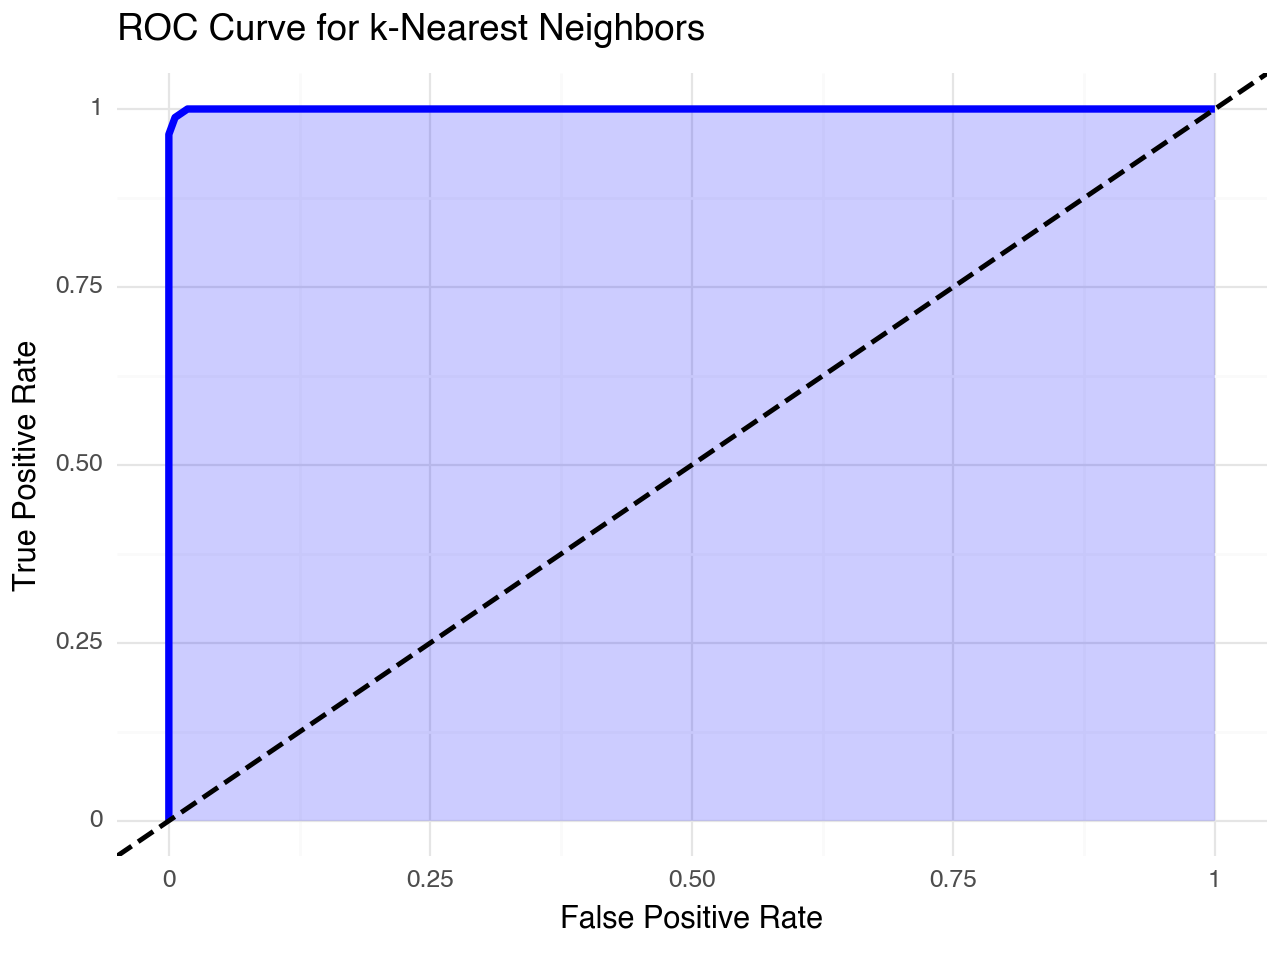

In [37]:

y_bin = label_binarize(y_test, classes=knn_pipe1.classes_)


y_probs_1 = knn_pipe1.predict_proba(X_test)


fpr, tpr, _ = roc_curve(y_bin.ravel(), y_probs_1.ravel())


roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})


plot = (ggplot(roc_df, aes(x = 'FPR', y = 'TPR')) +
        geom_area(alpha = 0.2, fill = 'blue') +
        geom_line(size = 1.5, color = 'blue') +  
        geom_abline(slope = 1, intercept = 0, linetype = 'dashed', color = 'black', size = 1) + 
        labs(title = 'ROC Curve for k-Nearest Neighbors', x = 'False Positive Rate', y = 'True Positive Rate') +
        theme_minimal() +  
        scale_color_manual(values = ['blue', 'black']))

print(plot)

/Users/ajtaghavi/anaconda3/lib/python3.11/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


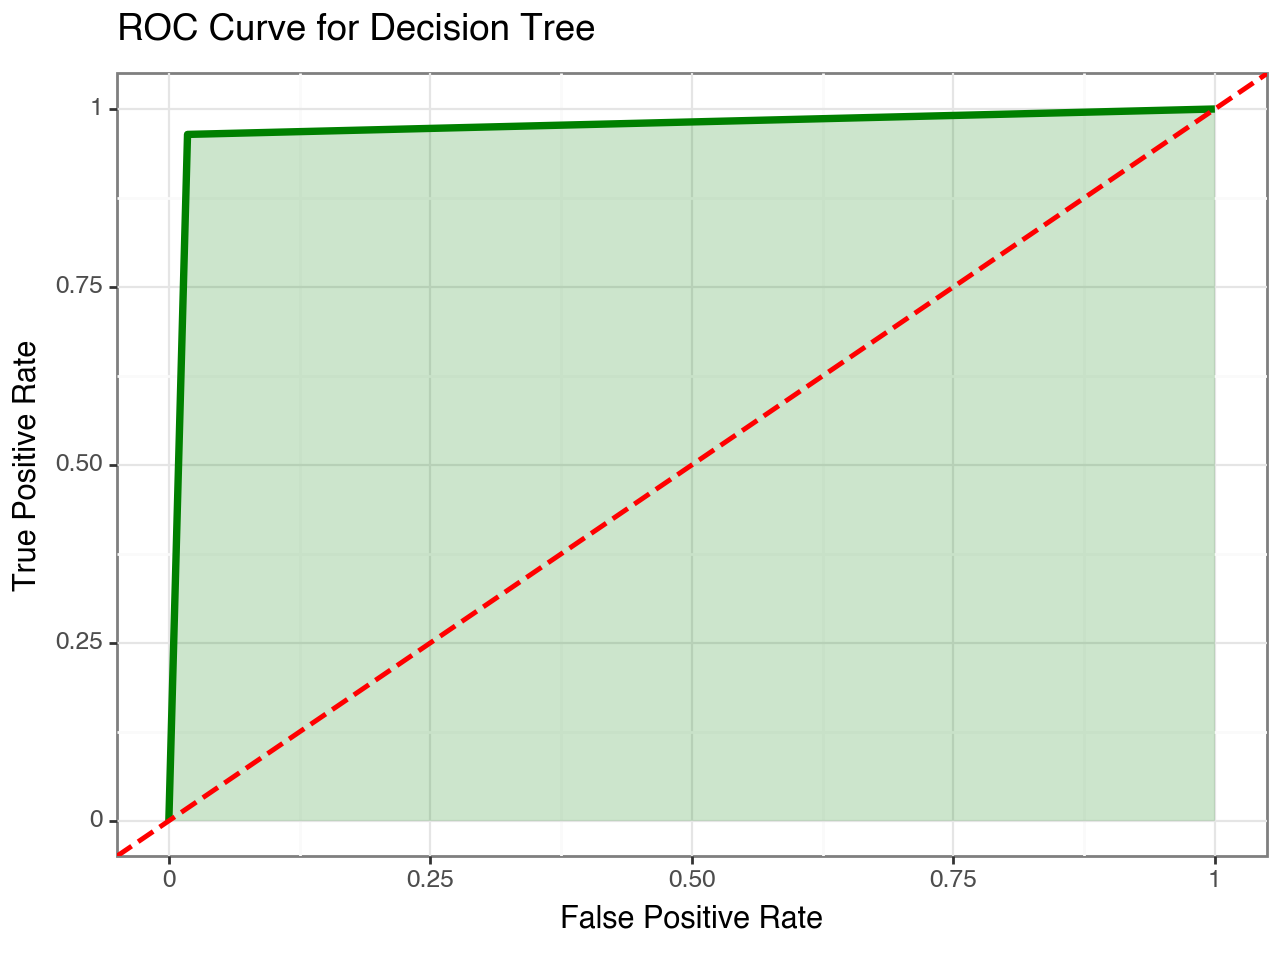

In [38]:

y_bin = label_binarize(y_test, classes=dt_pipe1.classes_)
y_probs_3 = dt_pipe1.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_probs_3.ravel())
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})




plot = (ggplot(roc_df, aes(x = 'FPR', y = 'TPR')) +
        geom_area(alpha = 0.2, fill = 'green') +  
        geom_line(size = 1.5, color = 'green') +  
        geom_abline(slope = 1, intercept = 0, linetype = 'dashed', color = 'red', size = 1) + 
        labs(title = 'ROC Curve for Decision Tree', x = 'False Positive Rate', y = 'True Positive Rate') +
        theme_bw() +  
        scale_color_manual(values = ['green', 'red'])) 

print(plot)